In [1]:
from pandas.core.arrays.sparse.array import NaT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.container import BarContainer
from matplotlib.axes import Axes
from pandas.core.groupby import DataFrameGroupBy
import seaborn as sns
import plotly.express as px

sns.set()
%config InlineBackend.figure_format = "png"


NA: str = "N/A"


def mount_google_drive() -> bool | None:
    """
    Function to mount Google Drive.
    :return: True if mounting is successful, None otherwise.
    """
    try:
        from google.colab.drive import mount

        mount(mountpoint="/content/drive")
        return True

    except Exception as error:
        print(f"Error while mounting Google Drive: {error}")
        raise


def get_google_drive_dataset_path() -> tuple:
    """
    Function to retrieve the path of the raw dataset from Google Drive.
    :return: Path of raw dataset as a string.
    """
    seasons_stats_dataset_path: str = "/content/drive/MyDrive/Hillel/Machine_Learning_Course/HW4/Seasons_Stats.csv"
    players_dataset_path: str = "/content/drive/MyDrive/Hillel/Machine_Learning_Course/HW4/Players.csv"
    player_data_dataset_path: str = "/content/drive/MyDrive/Hillel/Machine_Learning_Course/HW4/player_data.csv"

    return (seasons_stats_dataset_path, players_dataset_path, player_data_dataset_path)


def get_data_frame(dataset_path: str) -> tuple[pd.DataFrame] | None:
    """
    Function to convert the dataset into a pd.DataFrame.
    :param dataset_path: Path or URL of the dataset.
    :return: pd.DataFrame containing the dataset, or None if errors occur.
    """
    try:
        return pd.read_csv(filepath_or_buffer=dataset_path)

    except Exception as error:
        print(f"Error while converting dataset to NumPy array: {error}")
        raise


def main() -> tuple[pd.DataFrame] | None:
    """
    Main function to start the app.
    :return: pd.DataFrame containing the dataset, or None if errors occur.
    """
    if mount_google_drive():
        import os

        datasets_paths: tuple = get_google_drive_dataset_path()
        if all(map(os.path.exists, datasets_paths)):
            data_frames: tuple = tuple(get_data_frame(dataset_path=path) for path in datasets_paths)

            return data_frames

        else:
            print("Dataset path doesn't exists.")
            raise FileNotFoundError


if __name__ == "__main__":
    raw_data_frames: tuple | None = main()
    if raw_data_frames:
      seasons_stats_dataframe: pd.DataFrame = raw_data_frames[0]
      players_dataframe: pd.DataFrame = raw_data_frames[1]
      player_data_dataframe: pd.DataFrame = raw_data_frames[2]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
### SEASONS STATS DATAFRAME ###
rename_columns: dict = {"Pos": "position"}
drop_columns: list = ["Unnamed: 0", "blanl", "blank2"]
upper_columns: list = ["Player", "position"]

# seasons_stats_dataframe: pd.DataFrame = seasons_stats_dataframe.drop(columns=drop_columns).dropna(how="all", axis=0).dropna(how="all", axis=1).fillna(value=NA)
seasons_stats_dataframe: pd.DataFrame = seasons_stats_dataframe.drop(columns=drop_columns).dropna(how="all", axis=0).dropna(how="all", axis=1).rename(columns=rename_columns)
seasons_stats_dataframe[upper_columns]: pd.DataFrame = seasons_stats_dataframe[upper_columns].apply(lambda x: x.str.upper())
seasons_stats_dataframe.info()
seasons_stats_dataframe.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24624 entries, 0 to 24690
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      24624 non-null  float64
 1   Player    24624 non-null  object 
 2   position  24624 non-null  object 
 3   Age       24616 non-null  float64
 4   Tm        24624 non-null  object 
 5   G         24624 non-null  float64
 6   GS        18233 non-null  float64
 7   MP        24138 non-null  float64
 8   PER       24101 non-null  float64
 9   TS%       24538 non-null  float64
 10  3PAr      18839 non-null  float64
 11  FTr       24525 non-null  float64
 12  ORB%      20792 non-null  float64
 13  DRB%      20792 non-null  float64
 14  TRB%      21571 non-null  float64
 15  AST%      22555 non-null  float64
 16  STL%      20792 non-null  float64
 17  BLK%      20792 non-null  float64
 18  TOV%      19582 non-null  float64
 19  USG%      19640 non-null  float64
 20  OWS       24585 non-null  fl

,Year,Player,position,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,CURLY ARMSTRONG,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,CLIFF BARKER,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,LEO BARNHORST,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,ED BARTELS,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,ED BARTELS,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
### PLAYERS DATAFRAME ###
upper_columns: list = ["Player", "college"]
drop_columns: list = ["Unnamed: 0", ]
rename_columns: dict = {
    "born": "birth_year",
    "collage": "college",
    "height": "height_CM",
    "weight": "weight_KG"
    }

# players_dataframe: pd.DataFrame = players_dataframe.drop(columns=drop_columns).dropna(how="all").fillna(value=NA).rename(columns=rename_columns)
players_dataframe: pd.DataFrame = players_dataframe.drop(columns=drop_columns).dropna(how="all").rename(columns=rename_columns)
players_dataframe[upper_columns]: pd.DataFrame = players_dataframe[upper_columns].apply(lambda x: x.str.upper())
players_dataframe["birth_year"]: pd.Series = players_dataframe["birth_year"].astype("object")
players_dataframe.info()
players_dataframe.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height_CM    3921 non-null   float64
 2   weight_KG    3921 non-null   float64
 3   college      3573 non-null   object 
 4   birth_year   3921 non-null   object 
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(2), object(5)
memory usage: 245.1+ KB


,Player,height_CM,weight_KG,college,birth_year,birth_city,birth_state
0,CURLY ARMSTRONG,180.0,77.0,INDIANA UNIVERSITY,1918.0,NaN,NaN
1,CLIFF BARKER,188.0,83.0,UNIVERSITY OF KENTUCKY,1921.0,Yorktown,Indiana
2,LEO BARNHORST,193.0,86.0,UNIVERSITY OF NOTRE DAME,1924.0,NaN,NaN
3,ED BARTELS,196.0,88.0,NORTH CAROLINA STATE UNIVERSITY,1925.0,NaN,NaN
4,RALPH BEARD,178.0,79.0,UNIVERSITY OF KENTUCKY,1927.0,Hardinsburg,Kentucky


In [4]:
### PLAYER DATA DATAFRAME ###
upper_columns: list = ["Player", "college", "position"]
rename_columns: dict = {
    "name": "Player",
    "weight": "weight_LB",
    "height": "height_FT"
    }


# player_data_dataframe: pd.DataFrame = player_data_dataframe.dropna(how="all").fillna(value=NA).rename(columns={"name": "Player"})
player_data_dataframe: pd.DataFrame = player_data_dataframe.dropna(how="all").rename(columns=rename_columns)
player_data_dataframe[upper_columns]: pd.DataFrame = player_data_dataframe[upper_columns].apply(lambda x: x.str.upper())


## Розділяємо дату народження на 3 окремих ФІЧІ:
player_data_dataframe["birth_date"]: pd.Series = pd.to_datetime(arg=player_data_dataframe["birth_date"], errors="coerce")

player_data_dataframe["birth_year"]: pd.Series = player_data_dataframe["birth_date"].dt.year
player_data_dataframe["birth_month"]: pd.Series = player_data_dataframe["birth_date"].dt.month
player_data_dataframe["birth_day"]: pd.Series = player_data_dataframe["birth_date"].dt.day


## Переводимо колонку height_FT в валідний float (6-10 -> 6.833)
def convert_height(height_str: str) -> float:
    """
    Function converts players' height (feet) from string to valid float (6-10 -> 6.833).
    :param height_str: Players' height (feet).
    :return: Valid height (feet) in float type.
    """
    feet, inches = height_str.split(sep="-")
    return float(feet) + float(inches) / 12

player_data_dataframe["height_FT"]: pd.Series = player_data_dataframe["height_FT"].dropna(how="all").apply(convert_height)


##
player_data_dataframe.info()
player_data_dataframe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player       4550 non-null   object        
 1   year_start   4550 non-null   int64         
 2   year_end     4550 non-null   int64         
 3   position     4549 non-null   object        
 4   height_FT    4549 non-null   float64       
 5   weight_LB    4544 non-null   float64       
 6   birth_date   4519 non-null   datetime64[ns]
 7   college      4248 non-null   object        
 8   birth_year   4519 non-null   float64       
 9   birth_month  4519 non-null   float64       
 10  birth_day    4519 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 391.1+ KB


,Player,year_start,year_end,position,height_FT,weight_LB,birth_date,college,birth_year,birth_month,birth_day
0,ALAA ABDELNABY,1991,1995,F-C,6.833333,240.0,1968-06-24,DUKE UNIVERSITY,1968.0,6.0,24.0
1,ZAID ABDUL-AZIZ,1969,1978,C-F,6.750000,235.0,1946-04-07,IOWA STATE UNIVERSITY,1946.0,4.0,7.0
2,KAREEM ABDUL-JABBAR,1970,1989,C,7.166667,225.0,1947-04-16,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",1947.0,4.0,16.0
3,MAHMOUD ABDUL-RAUF,1991,2001,G,6.083333,162.0,1969-03-09,LOUISIANA STATE UNIVERSITY,1969.0,3.0,9.0
4,TARIQ ABDUL-WAHAD,1998,2003,F,6.500000,223.0,1974-11-03,SAN JOSE STATE UNIVERSITY,1974.0,11.0,3.0


In [5]:
## MERGE "players_dataframe" AND "player_data_dataframe" TO "full_players_data":
# full_players_data: pd.DataFrame = player_data_dataframe.merge(right=players_dataframe, on=["Player", "birth_year", "college"], how="outer").fillna(value=NA)
full_players_data: pd.DataFrame = player_data_dataframe.merge(right=players_dataframe, on=["Player", "birth_year", "college"], how="outer")
full_players_data.info()
full_players_data.head(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4966
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player       4967 non-null   object        
 1   year_start   4550 non-null   float64       
 2   year_end     4550 non-null   float64       
 3   position     4549 non-null   object        
 4   height_FT    4549 non-null   float64       
 5   weight_LB    4544 non-null   float64       
 6   birth_date   4519 non-null   datetime64[ns]
 7   college      4569 non-null   object        
 8   birth_year   4936 non-null   object        
 9   birth_month  4519 non-null   float64       
 10  birth_day    4519 non-null   float64       
 11  height_CM    3921 non-null   float64       
 12  weight_KG    3921 non-null   float64       
 13  birth_city   3452 non-null   object        
 14  birth_state  3439 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(6)
memory usag

<ipython-input-5-6c2488eac454>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  full_players_data: pd.DataFrame = player_data_dataframe.merge(right=players_dataframe, on=["Player", "birth_year", "college"], how="outer")


,Player,year_start,year_end,position,height_FT,weight_LB,birth_date,college,birth_year,birth_month,birth_day,height_CM,weight_KG,birth_city,birth_state
0,ALAA ABDELNABY,1991.0,1995.0,F-C,6.833333,240.0,1968-06-24,DUKE UNIVERSITY,1968.0,6.0,24.0,208.0,108.0,Cairo,Egypt
1,ZAID ABDUL-AZIZ,1969.0,1978.0,C-F,6.750000,235.0,1946-04-07,IOWA STATE UNIVERSITY,1946.0,4.0,7.0,206.0,106.0,Brooklyn,New York
2,KAREEM ABDUL-JABBAR,1970.0,1989.0,C,7.166667,225.0,1947-04-16,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",1947.0,4.0,16.0,NaN,NaN,NaN,NaN
3,MAHMOUD ABDUL-RAUF,1991.0,2001.0,G,6.083333,162.0,1969-03-09,LOUISIANA STATE UNIVERSITY,1969.0,3.0,9.0,NaN,NaN,NaN,NaN
4,TARIQ ABDUL-WAHAD,1998.0,2003.0,F,6.500000,223.0,1974-11-03,SAN JOSE STATE UNIVERSITY,1974.0,11.0,3.0,198.0,101.0,Maisons Alfort,France


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player       4967 non-null   object        
 1   year_start   4550 non-null   float64       
 2   year_end     4550 non-null   float64       
 3   position     4549 non-null   object        
 4   height_FT    4549 non-null   float64       
 5   birth_date   4519 non-null   datetime64[ns]
 6   college      4569 non-null   object        
 7   birth_year   4936 non-null   object        
 8   birth_month  4519 non-null   float64       
 9   birth_day    4519 non-null   float64       
 10  height_CM    3921 non-null   float64       
 11  weight_KG    4965 non-null   float64       
 12  birth_city   3452 non-null   object        
 13  birth_state  3439 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(6)
memory usage: 582.1+ KB


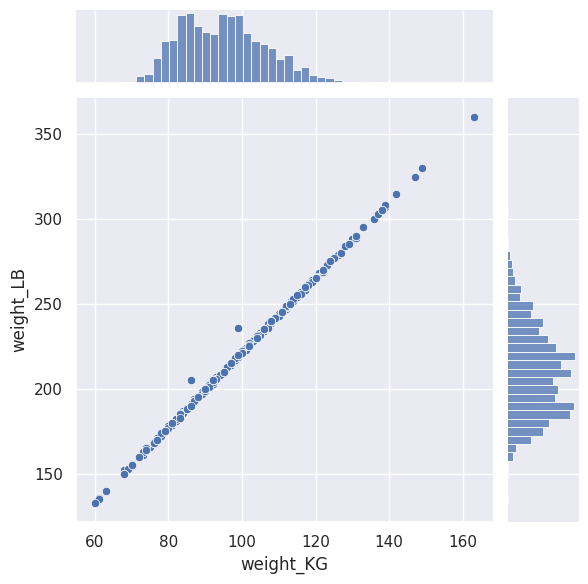

In [6]:
## На цій діаграмі можна побачити явну кореляцію ваги гравця в КГ та ваги гравця в LB (фунти).:
sns.jointplot(x="weight_KG", y="weight_LB", data=full_players_data, kind="scatter", dropna=True)

## Тому їх можна обʼєднати в одну ФІЧУ, і видалити зайву колонку:
full_players_data["weight_KG"]: pd.Series = full_players_data["weight_KG"].fillna(value=full_players_data["weight_LB"] * 0.45359237)
full_players_data: pd.DataFrame = full_players_data.drop(columns="weight_LB")

full_players_data.info()


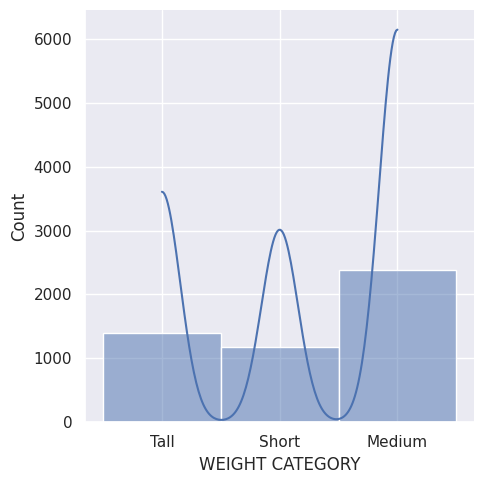

In [7]:
## Фіча, категорія ваги
def categorize_weight(weight: np.float64) -> str:
    """
    Function makes weight category according player's weight.
    :param age: Player's weight.
    :return: Weight category.
    """
    if weight < 85:
        return "Short"
    elif 85 <= weight <= 100:
        return "Medium"
    elif weight > 100:
        return "Tall"

full_players_data["WEIGHT CATEGORY"]: pd.Series = full_players_data["weight_KG"].apply(categorize_weight)

sns.displot(data=full_players_data["WEIGHT CATEGORY"], kde=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4966
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Player           4967 non-null   object        
 1   year_start       4550 non-null   float64       
 2   year_end         4550 non-null   float64       
 3   position         4549 non-null   object        
 4   birth_date       4519 non-null   datetime64[ns]
 5   college          4569 non-null   object        
 6   birth_year       4936 non-null   object        
 7   birth_month      4519 non-null   float64       
 8   birth_day        4519 non-null   float64       
 9   height_CM        4967 non-null   float64       
 10  weight_KG        4965 non-null   float64       
 11  birth_city       3452 non-null   object        
 12  birth_state      3439 non-null   object        
 13  WEIGHT CATEGORY  4965 non-null   object        
dtypes: datetime64[ns](1), float64(6), object

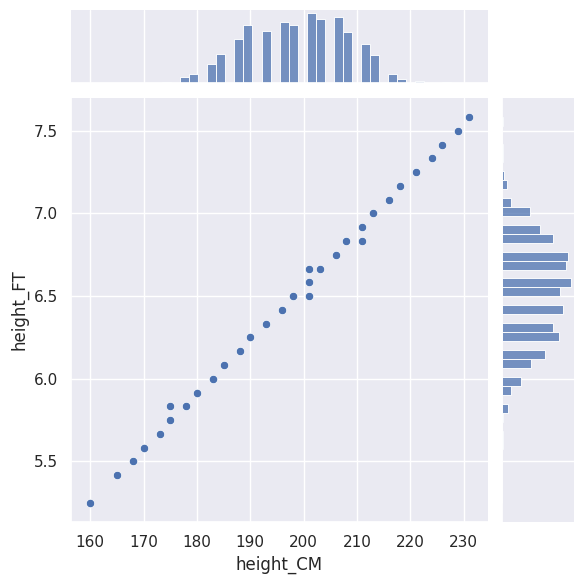

In [8]:
## На цій діаграмі можна побачити явну кореляцію зросту гравця в СМ та зросту гравця в FT (фути).:
sns.jointplot(x="height_CM", y="height_FT", data=full_players_data, kind="scatter", dropna=True)

## Тому їх можна обʼєднати в одну ФІЧУ, і видалити зайву колонку:
full_players_data["height_CM"]: pd.Series = full_players_data["height_CM"].fillna(value=full_players_data["height_FT"] * 30.48)
full_players_data: pd.DataFrame = full_players_data.drop(columns="height_FT")

full_players_data.info()


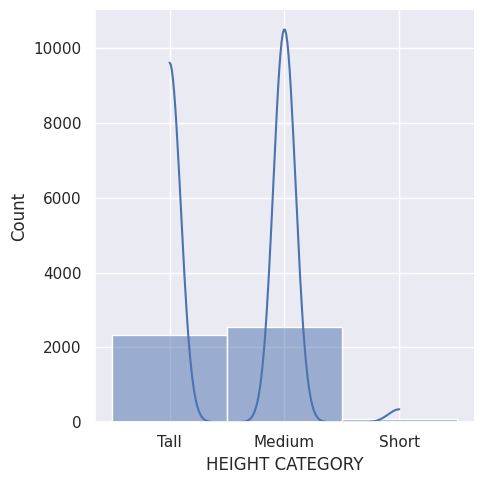

In [9]:
## Фіча, категорія росту
def categorize_height(height: np.float64) -> str:
    """
    Function makes height category according player's height.
    :param age: Player's height.
    :return: Height category.
    """
    if height < 180:
        return "Short"
    elif 180 <= height <= 200:
        return "Medium"
    elif height > 200:
        return "Tall"

full_players_data["HEIGHT CATEGORY"]: pd.Series = full_players_data["height_CM"].apply(categorize_height)

sns.displot(data=full_players_data["HEIGHT CATEGORY"], kde=True)


In [10]:
## MERGE "full_players_data" AND "seasons_stats_dataframe" TO "full_dataset":
# full_dataset: pd.DataFrame = seasons_stats_dataframe.merge(right=full_players_data, on="Player", how="outer").fillna(value=NA)
full_dataset: pd.DataFrame = seasons_stats_dataframe.merge(right=full_players_data, on=["Player", "position"], how="outer")
full_dataset.info()
# full_dataset.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28856 entries, 0 to 28855
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             24624 non-null  float64       
 1   Player           28856 non-null  object        
 2   position         28438 non-null  object        
 3   Age              24616 non-null  float64       
 4   Tm               24624 non-null  object        
 5   G                24624 non-null  float64       
 6   GS               18233 non-null  float64       
 7   MP               24138 non-null  float64       
 8   PER              24101 non-null  float64       
 9   TS%              24538 non-null  float64       
 10  3PAr             18839 non-null  float64       
 11  FTr              24525 non-null  float64       
 12  ORB%             20792 non-null  float64       
 13  DRB%             20792 non-null  float64       
 14  TRB%             21571 non-null  float

count    6681.000000
mean        5.382428
std         4.761496
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        22.000000
Name: YEARS OF PLAY, dtype: float64


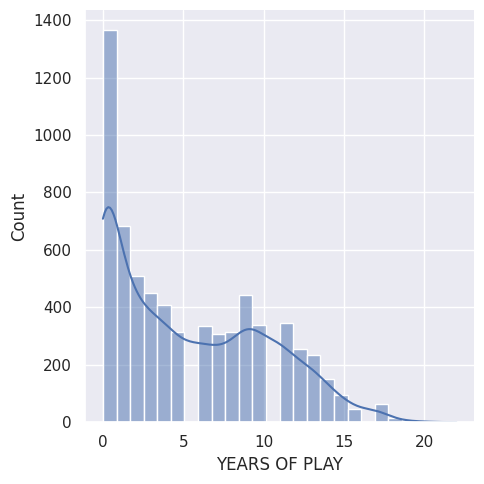

In [11]:
## Фіча, скількі років грав в NBA
full_dataset["YEARS OF PLAY"]: pd.Series = full_dataset["year_end"] - full_dataset["year_start"]
print(full_dataset["YEARS OF PLAY"].describe())

# На цьому графіку можна побачити, що переважна кількість гравців грає від менше 1 року до 1 року.
# А в середньому 4 роки
sns.displot(data=full_dataset.dropna(how="all"), x="YEARS OF PLAY", kde=True)


count    24616.000000
mean        26.664405
std          3.841892
min         18.000000
25%         24.000000
50%         26.000000
75%         29.000000
max         44.000000
Name: Age, dtype: float64


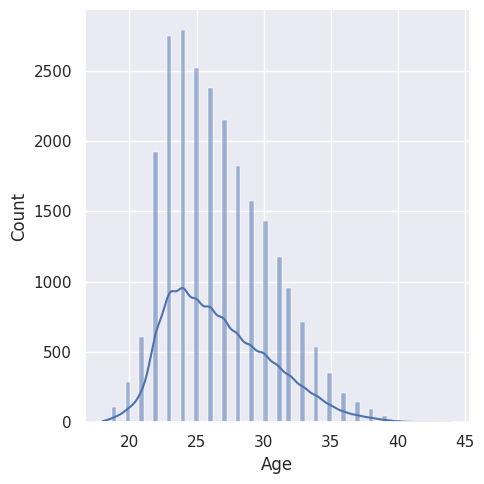

In [12]:
## Фіча, категорія віку
def categorize_age(age: np.float64) -> str:
    """
    Function makes age category according player's age.
    :param age: Player's age.
    :return: Age category.
    """
    if age < 25:
        return "Young"
    elif 25 <= age <= 30:
        return "Medium"
    elif age > 30:
        return "Experienced"

full_dataset["AGE CATEGORY"]: pd.Series = full_dataset["Age"].apply(categorize_age)

print(full_dataset["Age"].describe())

# На цьому графіку можна побачити, що в NBA грають гравці від 18 до 44 років.
# Середній вік гравців складає 26 років. Найбільша кількість гравців попадає на вік 23-24 роки.
sns.displot(data=full_dataset.dropna(how="all"), x="Age", kde=True)

PF       4966
C        4833
SG       4811
SF       4699
PG       4648
G        1616
F        1329
F-C       432
G-F       396
F-G       248
C-F       236
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: position, dtype: int64


<Axes: xlabel='position'>

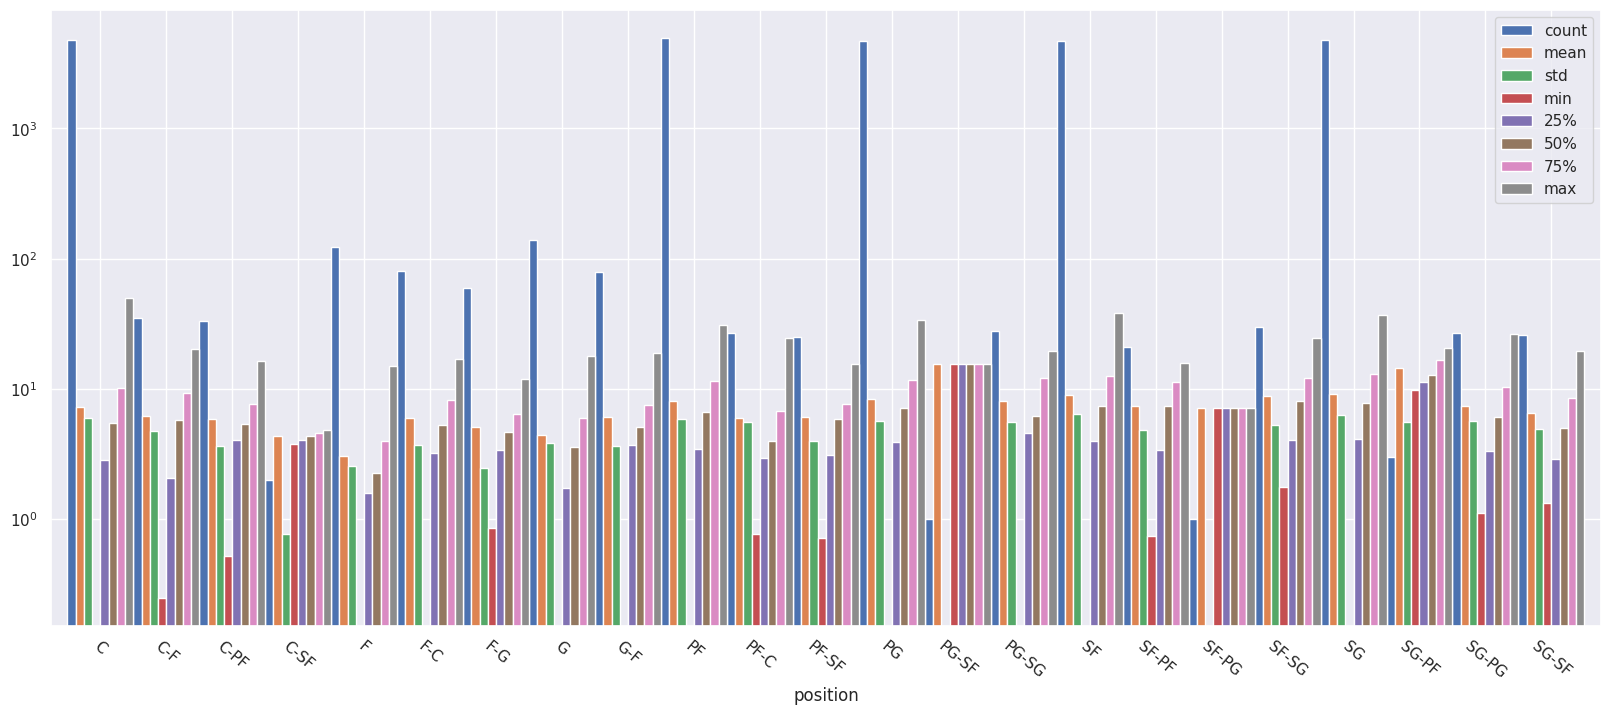

In [13]:
## Фіча, середня кількість очок за гру
full_dataset["AVG PTS/GAME"]: pd.Series = full_dataset["PTS"] / full_dataset["G"]

# PF (Power Forward), C (Center), SG (Shooting Guard), SF (Small Forward), PG (Point Guard), G (Guard),
# F (Forward), F-C (Forward-Center), G-F (Guard-Forward), F-G (Forward-Guard), C-F (Center-Forward),
# C-PF (Center-Power Forward), SF-SG (Small Forward-Shooting Guard), PG-SG (Point Guard-Shooting Guard),
# SG-PG (Shooting Guard-Point Guard), PF-C (Power Forward-Center), SG-SF (Shooting Guard-Small Forward),
# PF-SF (Power Forward-Small Forward), SF-PF (Small Forward-Power Forward), SG-PF (Shooting Guard-Power Forward),
# C-SF (Center-Small Forward), SF-PG (Small Forward-Point Guard) == PG-SF (Point Guard Small Forward)

print(full_dataset["position"].value_counts())
# На цій діаграмі можно побачити, що найбільшу кількість очок заробляють гравці на позиціях:
# C (Center), PF (Power Forward), PG (Point Guard), SF (Small Forward), SG (Shooting Guard)
# А найменьшу C-SF (Center-Small Forward), PG-SF == SF-PG (Point Guard Small Forward), SG-PF (Shooting Guard-Power Forward)
# З чого можна зробити висновок, що C-SF, PG-SF, SF-PG, SG-PF - найслабкіші атакуючі позиції.
full_dataset.groupby(by=["position"])["AVG PTS/GAME"].describe().plot.bar(
    figsize=(20, 8),
    logy=True,
    rot=320,
    width=1
)


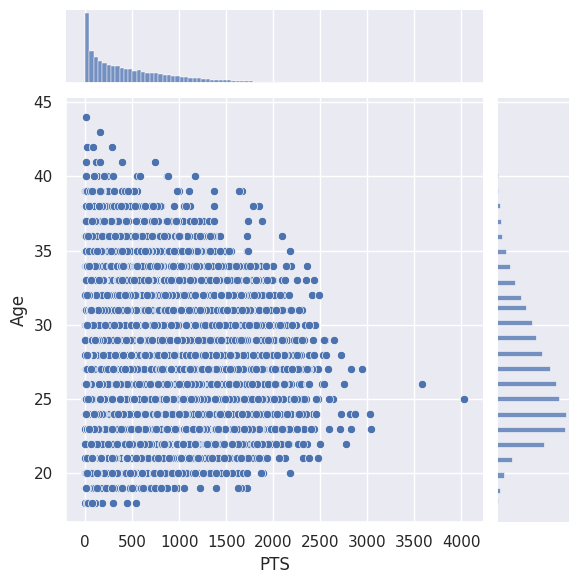

In [14]:
sns.jointplot(x="PTS", y="Age", data=full_dataset, kind="scatter", dropna=True)

# На цій діаграмі можна побачити, що найбільша кількість зароблених очок перепадає на гравців 23-25 років

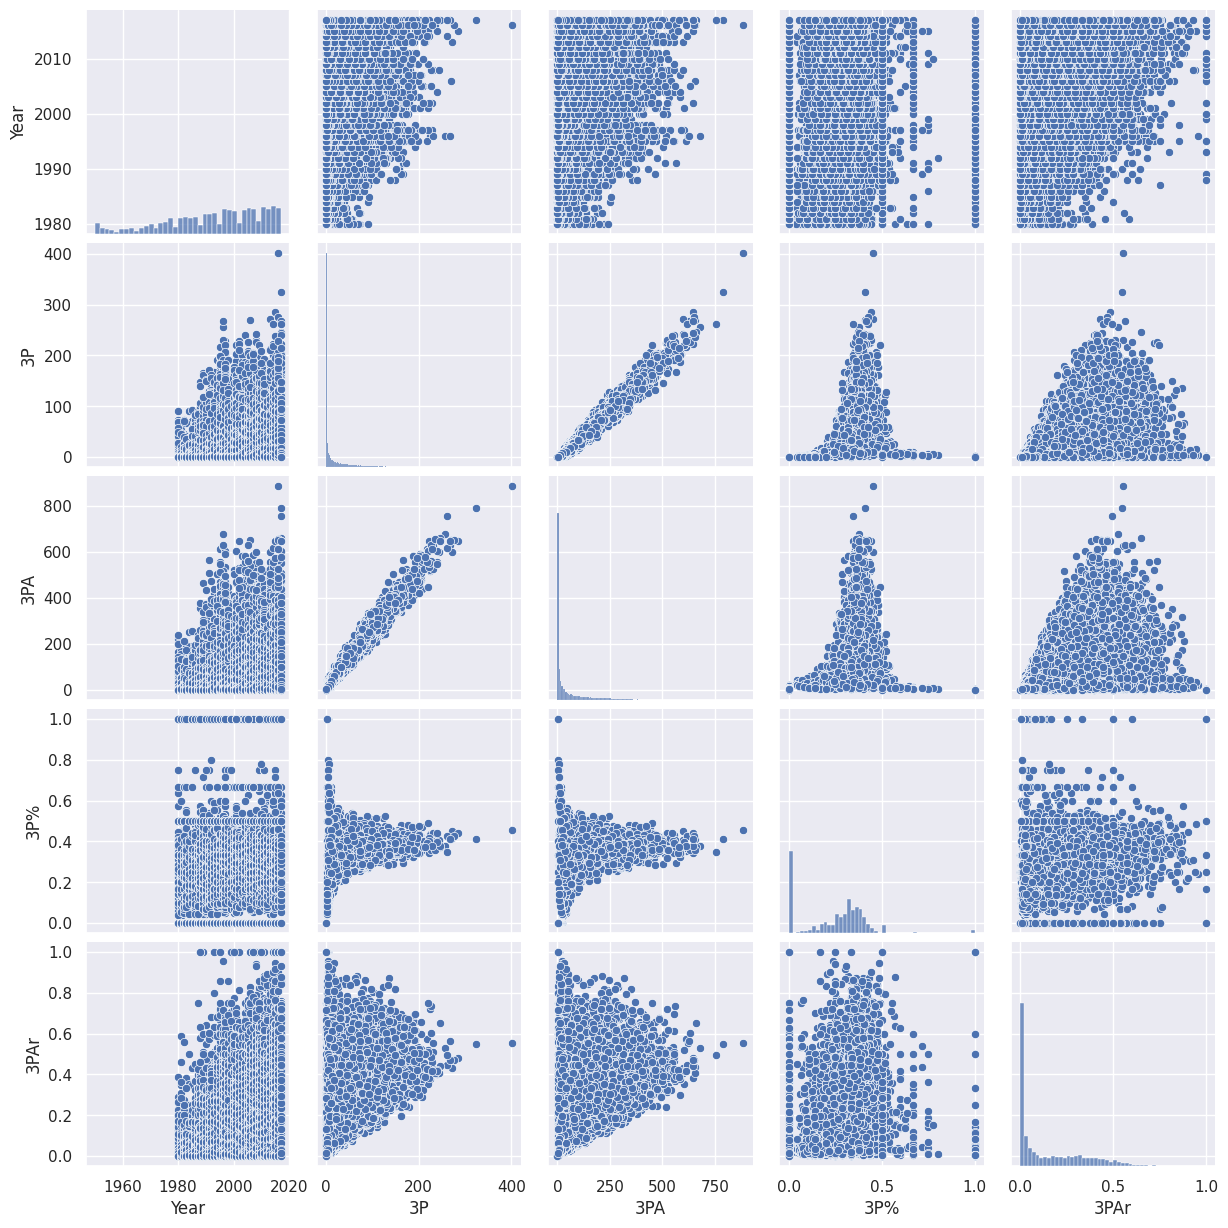

In [15]:
## На цій діаграмі спостерігається очевидна межа між роком та статистикою за 3х-очкові броски.
## І дійсно, після інвестігейту, зʼясувалося, що 3х-очкові броски були вперше дозволені в НБА в сезоні 1979-1980 років.
sns.pairplot(full_dataset[["Year", "3P", "3PA", "3P%", "3PAr"]])


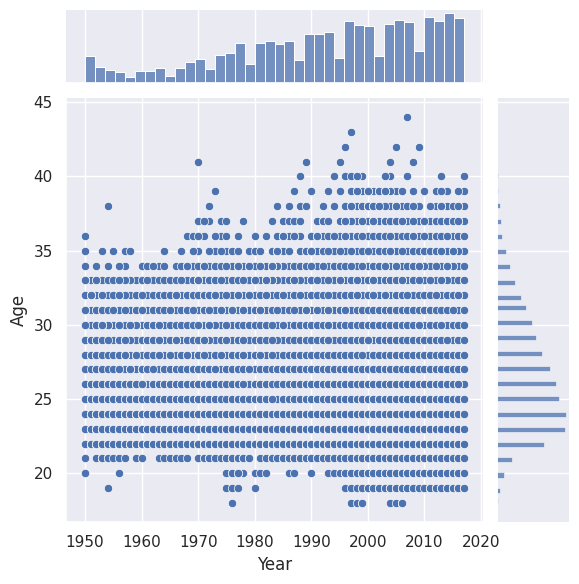

In [16]:
sns.jointplot(x="Year", y="Age", data=full_dataset, kind="scatter", dropna=True)
## З часом вік гравців в NBA розширювався.В 1950 ~ від 20 до 35 рокі. На сьогодні ~ від 18 до 40 років.

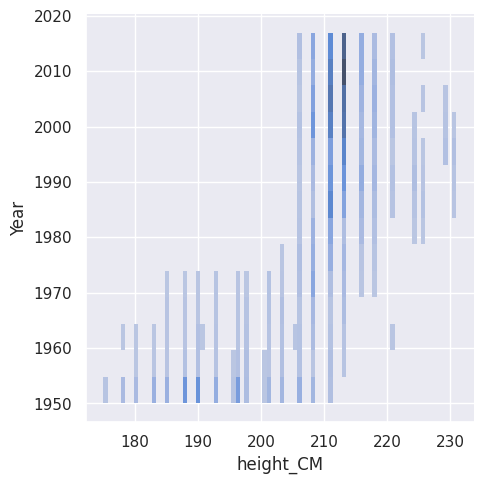

In [17]:
sns.displot(data=full_dataset, x="height_CM", y="Year")
## З данних графіка можна відмітити, що з 1971 року почав струмко зростати середній зріст гравців.
## Так, дуже цікаво те, що після цих років в NBA грають гравці не нижче 200 см. Хоча офіційного підтвердження
## цьому немає, і правила ліги не забороняють грати гравцям нижче цього зросту.
## Це може бути пов'язано з їх фізичними перевагами та потенціалом в різних аспектах гри.

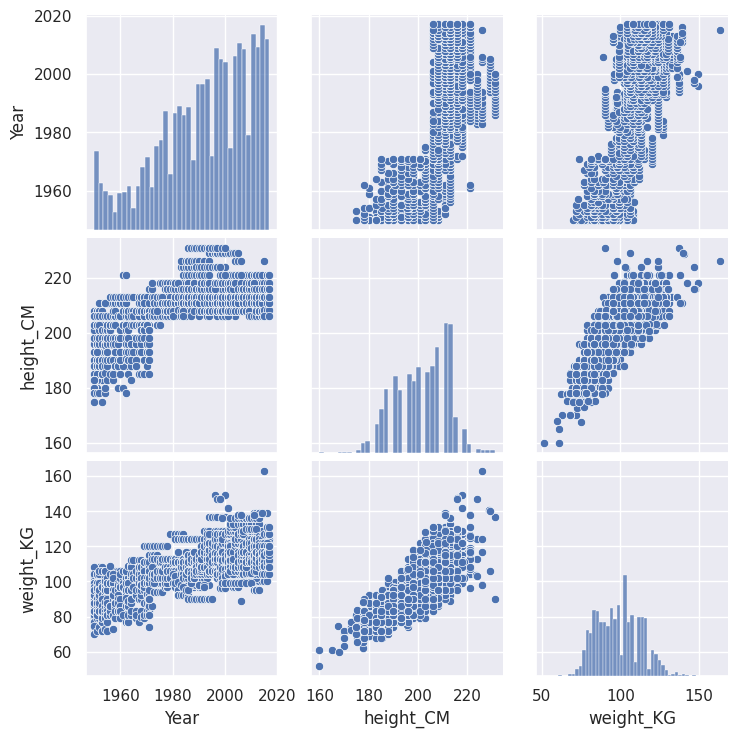

In [18]:
## Також спостерігається і закономірне збільшення ваги гравця з часом, через збільшення зросту.
sns.pairplot(full_dataset[["Year", "height_CM", "weight_KG"]])

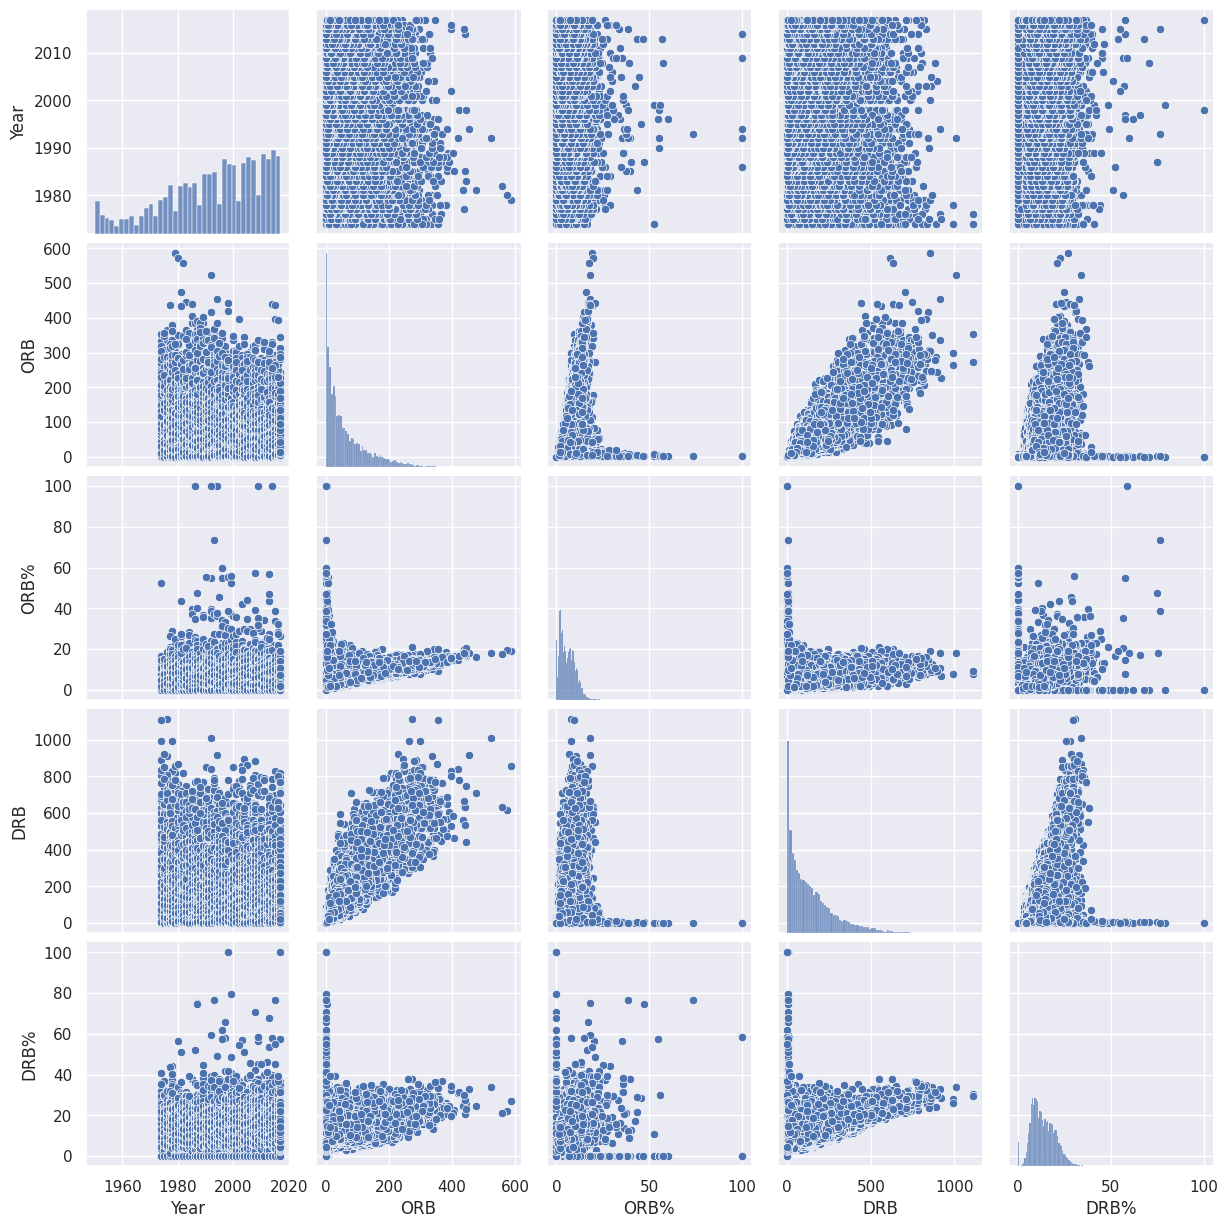

In [19]:
## Щодо підборів в нападенні (Offensive Rebounds, ORB), та підборів в захисті (Defensive Rebounds, DRB).
## На графіку видно, що вони почалися в 1971 році (як і з гравцми нижче 200см).
## Але ORB та DRB дозволені з самого початку ліги (1946 рік).
## Тому скоріше за все тут не повна статистика, або її почали вести саме з цьогороку.
## Це також стосується таких дисциплин як:
## TRB, STL%, BLK%, TOV%, USG%, OBPM, DBPM, BPM, VORP, STL, BLK, TOV, AST%
## з невеликою різницею в часі появи в статистиці 1971-1975 роки
sns.pairplot(full_dataset[["Year", "ORB", "ORB%", "DRB", "DRB%"]])

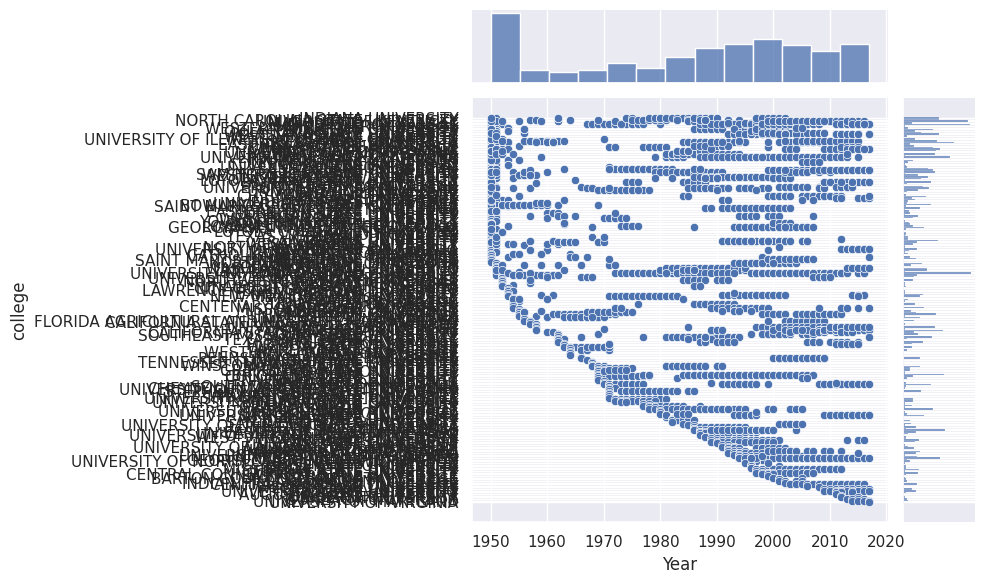

In [20]:
## Цей графік показує, як з часом до ліги доєднується випусники нових навчальних закладів,
## Та кількість випускників на кожний рік та навчальний заклад. Є певні лідери.
sns.jointplot(x="Year", y="college", data=full_dataset[["Year", "college"]].dropna(how="any"), dropna=True)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


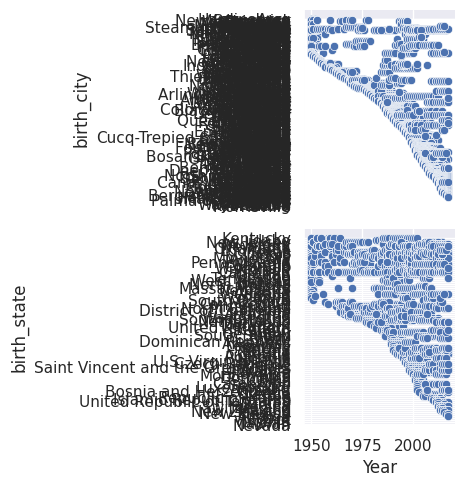

In [21]:
## На графіку нижче можна бачити історію доєднування гравців з інших міст, штатів, та держав:
sns.pairplot(full_dataset, x_vars="Year", y_vars=['birth_city', 'birth_state',])

# state_dataframe: pd.DataFrame = full_dataset[["Year", "birth_state"]].dropna(how="any").groupby(['Year', 'birth_state']).size().unstack(fill_value=0)
# sns.heatmap(state_dataframe, annot=True, fmt=".1f", linewidths=0.5)

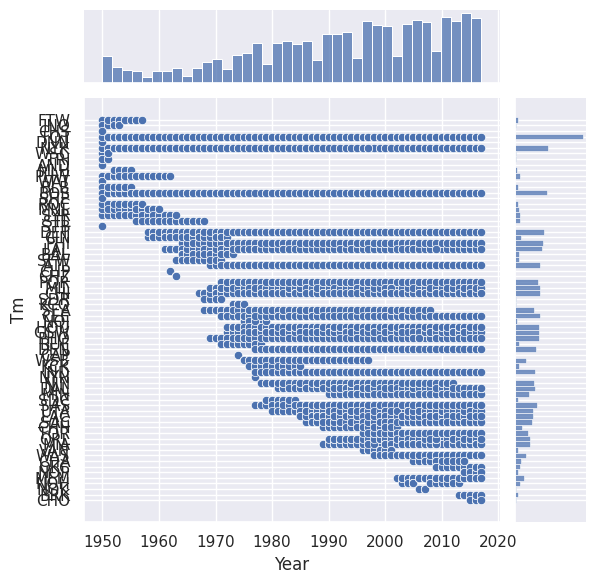

In [22]:
## Історія появи нових команд в лізі.
sns.jointplot(x="Year", y="Tm", data=full_dataset[["Year", "Tm"]].dropna(how="any"), dropna=True)

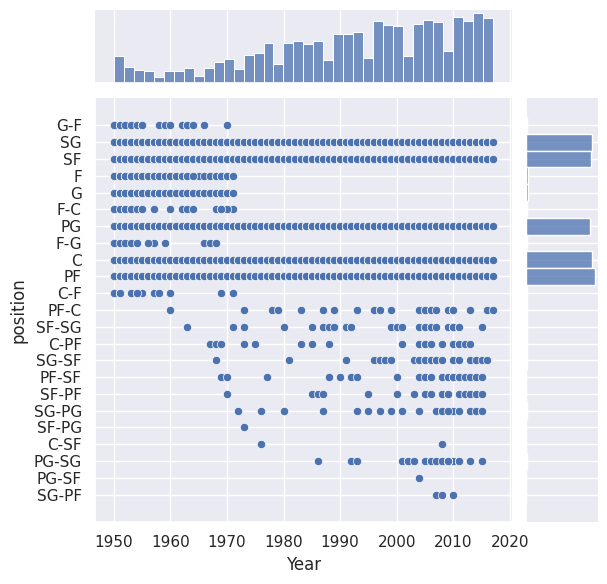

In [23]:
## Історія появи, (ймовірно зникання деяких), та популярності ролей (позицій) гравців.
## Можна відмітити, що найпопулярніші позиції такі як SG, SF, PG, C, PF
## звʼявилися на початку формування ліги в 1946 році, та й актуальні досі, і є основою складу майже кожної команди.
sns.jointplot(x="Year", y="position", data=full_dataset[["Year", "position"]].dropna(how="any"), dropna=True)